In [1]:
# Mounting drive for dataset
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/Data Mining (IBM Training)"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Data Mining (IBM Training)


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Checking shape and size
print('Shape : ',diabetes.shape)
print('Size : ',diabetes.size)

Shape :  (768, 9)
Size :  6912


In [14]:
# Checking zero or null values
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see there is no null values.

In [4]:
# Checking data types
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Analysing Data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


By analysing data, we noticed that some parameters of a person cannot be zero.
For example - Glucose level of a person cannot be zero.
Similarly, Blood Pressure, Skin Thickness, Insulin, BMI and Age cannot be zero.

In [10]:
# Replacing Wrong Values (zero) in Non-Zero Columns with null value
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']:
  diabetes[col] = diabetes[col].replace(0, np.NaN)

In [11]:
# Now, replacing null Values with mean
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']:
  diabetes[col] = diabetes[col].replace(np.NaN, int(diabetes[col].mean(skipna=True)))

In [12]:
# Checking Data
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    155.0  33.6   
1              1     85.0           66.0           29.0    155.0  26.6   
2              8    183.0           64.0           29.0    155.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    155.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    155.0  30.1   
767            1     93.0           70.0           31.0    155.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Now we can see zero values are replaced.

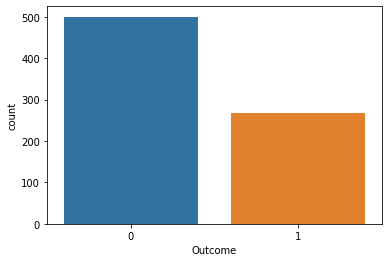

In [13]:
# Plotting number of diabetic and non-diabetic persons
sns.countplot(x = 'Outcome', data = diabetes)

In [17]:
# Checking correlation b/w parameters
correlation = diabetes.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
BMI,0.021546,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


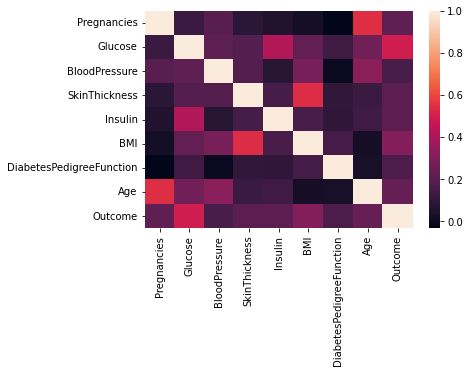

In [18]:
# Visualizing correlation using heatmap
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns)

From above correlation, we can see that Glucose has maximum correlation with Outcome.
Also, Pregnancies, SkinThickness, Insulin, BMI and Age have good correlation with Outcome.

In [19]:
# Splitting data into target and independent variables
X = diabetes.iloc[:,0:8]
y = diabetes.iloc[:,8]

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [21]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [36]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

---
# **1. Logistic Regression**
---





In [37]:
# Importing logistic model and fitting the model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [38]:
# Predicting target of test dataset
y_pred = logistic_model.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 1]


In [39]:
# Checking accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy : ',accuracy_score(y_test, y_pred))

Accuracy :  0.7987012987012987


In [40]:
# Printing confusion matrix
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))

Confusion Matrix : 
 [[94 16]
 [15 29]]


---

# **2. Decision Tree**

---



In [43]:
# Applying decision tree classifier using entropy
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3,min_samples_leaf=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=42)

In [47]:
# Accuracy of decision tree using entropy
y_dt_predicted = decision_tree.predict(X_test)
print('Accuracy using decision tree entropy : ',accuracy_score(y_dt_predicted, y_test))

Accuracy using decision tree entropy :  0.7337662337662337


In [46]:
# Applying decision tree classifier using gini index
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3,min_samples_leaf=3)
decision_tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=42)

In [48]:
# Accuracy of decision tree using gini index
y_dt_gini_predicted = decision_tree_gini.predict(X_test)
print('Accuracy using decision tree gini index : ',accuracy_score(y_dt_gini_predicted, y_test))

Accuracy using decision tree gini index :  0.7337662337662337


---

# **3. Random Forest**

---



In [49]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Fitting the training data with Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 20, random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [68]:
# Accuracy of Random Forest
print("Accuracy using Random Forest on training data : ",random_forest.score(X_train,y_train))
print("Accuracy using Random Forest on testing data : ",random_forest.score(X_test, y_test))

Accuracy using Random Forest on training data :  0.996742671009772
Accuracy using Random Forest on testing data :  0.8181818181818182


# ***SUMMARY***
---
1. Accuracy using Logistic Regression : 79.87%
2. Accuracy using Decision Tree Gini Index : 73.37%
3. Accuracy using Decision Tree Entropy : 73.37%
4. Accuracy using Random Forest : 81.81%


# ***CONCLUSION***
---
We can conclude that RANDOM FOREST has best result with 81.81% accuracy.